In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1> **Import necessary libraries:** The code begins by importing the necessary libraries. pandas is used for data manipulation, sklearn for machine learning tasks, matplotlib and seaborn for data visualization, and numpy for numerical operations.

2>**Load the datasets:** The code reads two CSV files containing fake and real news articles.

3>**Assign labels:** The code assigns labels to the articles: ‘1’ for fake news and ‘0’ for real news.

4>**Drop unnecessary columns:** The code drops the ‘title’, ‘subject’, and ‘date’ columns from the datasets as they are not needed for the classification task.

5>**Merge and shuffle the dataframes:** The datasets are merged into one and shuffled to ensure a good mix of fake and real news articles.

6>**Preprocess the text:** The text is preprocessed by converting it to lowercase and replacing non-word characters with spaces.

7>**Split the data into training and testing sets:** The data is split into a training set and a testing set. 80% of the data is used for training the model and the remaining 20% is used for testing the model’s performance.

8>**Vectorize the text data:** The text data is converted into numerical data using the TF-IDF vectorizer. This is necessary because machine learning models cannot work with raw text data.

9>**Train a Logistic Regression model:** A Logistic Regression model is trained on the training data. This model will learn to classify news articles as fake or real based on the features extracted from the text.

10>**Make predictions:** The trained model is used to make predictions on the testing data.

11>**Print the accuracy and classification report:** The accuracy of the model is calculated and a classification report is printed. The classification report includes precision, recall, and F1-score for each class.

12>**Compute ROC curve and ROC area for each class:** The Receiver Operating Characteristic (ROC) curve and the area under the ROC curve (AUC) are computed. These metrics provide a comprehensive view of the model’s performance across all possible classification thresholds.

13>**Plot ROC curve:** The ROC curve is plotted. The curve shows the true positive rate (sensitivity) against the false positive rate (1 - specificity) for different possible thresholds of a classifier.

14>**Compute precision, recall, F1-score and support:** The precision, recall, F1-score, and support for each class are computed. These metrics provide a detailed view of the model’s performance.

15>**Plot bar graph for precision, recall, F1-score:** A bar graph is plotted showing the precision, recall, and F1-score for each class. This graph provides a visual comparison of the model’s performance on the two classes.

16>**Function to predict if a news article is fake or not:** A function is defined that takes a news article as input, preprocesses and vectorizes the text, makes a prediction using the trained model, and then returns whether the news article is predicted to be fake or real.

17>**Test the function:** The function is tested by passing a news article to it. The function prints either “Fake” or “Real” depending on the prediction of the model.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the datasets
df1 = pd.read_csv("/content/drive/MyDrive/Datasets/Fake.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Datasets/True.csv")

# Assign labels
df1["response"] = 1
df2["response"] = 0

# Drop unnecessary columns
df1 = df1.drop(["title","subject","date"], axis=1)
df2 = df2.drop(["title","subject","date"], axis=1)

# Merge and shuffle the dataframes
df = pd.concat([df1, df2], ignore_index=True).sample(frac=1, random_state=42)

# Preprocess the text
df["text"] = df["text"].str.lower().str.replace('\W', ' ')

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df["text"], df["response"], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Print the accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.984521158129176
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4270
           1       0.99      0.98      0.99      4710

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



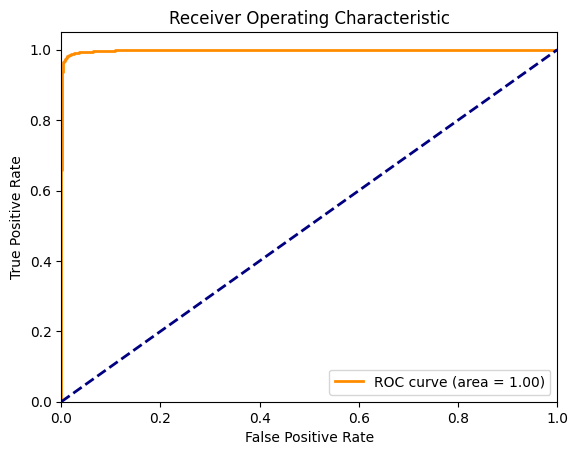

<Figure size 640x480 with 0 Axes>

In [11]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_score = model.decision_function(x_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
plt.savefig('roc_curve.png')

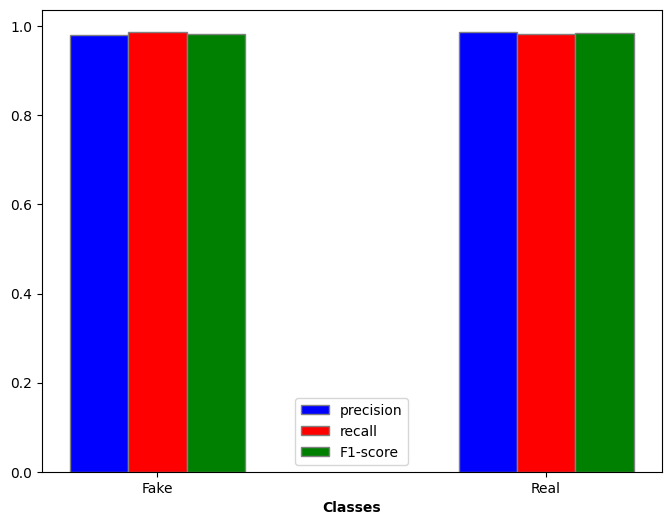

<Figure size 640x480 with 0 Axes>

In [12]:
# Compute precision, recall, F1-score and support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)

# Plot bar graph for precision, recall, F1-score
plt.figure(figsize=(8, 6))
barWidth = 0.15
r1 = np.arange(len(precision))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, precision, color='b', width=barWidth, edgecolor='grey', label='precision')
plt.bar(r2, recall, color='r', width=barWidth, edgecolor='grey', label='recall')
plt.bar(r3, fscore, color='g', width=barWidth, edgecolor='grey', label='F1-score')

plt.xlabel('Classes', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(precision))], ['Fake', 'Real'])
plt.legend()
plt.show()
plt.savefig('precision_recall_fscore.png')

In [8]:
# Function to predict if a news article is fake or not
def predict_fake_news(news_article):
    # Preprocess the text
    news_article = news_article.lower().replace('\W', ' ')

    # Vectorize the text
    news_article_vectorized = vectorizer.transform([news_article])

    # Make a prediction
    prediction = model.predict(news_article_vectorized)

    # Return the prediction
    return "Fake" if prediction[0] == 1 else "Real"

1>**Fake news:** Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, and CBS. Yet, these corporations function under many different brands, such as FOX, ABC, CNN, Comcast, Wall Street Journal, etc, giving people the perception of choice   As Tavistock s researchers showed, it was important that the victims of mass brainwashing not be aware that their environment was being controlled; there should thus be a vast number of sources for information, whose messages could be varied slightly, so as to mask the sense of external control. ~ Specialist of mass brainwashing, L. WolfeNew Brainwashing Tactic Called AstroturfWith alternative media on the rise, the propaganda machine continues to expand. Below is a video of Sharyl Attkisson, investigative reporter with CBS, during which she explains how  astroturf,  or fake grassroots movements, are used to spin information not only to influence journalists but to sway public opinion. Astroturf is a perversion of grassroots. Astroturf is when political, corporate or other special interests disguise themselves and publish blogs, start facebook and twitter accounts, publish ads, letters to the editor, or simply post comments online, to try to fool you into thinking an independent or grassroots movement is speaking. ~ Sharyl Attkisson, Investigative ReporterHow do you separate fact from fiction? Sharyl Attkisson finishes her talk with some insights on how to identify signs of propaganda and astroturfing  These methods are used to give people the impression that there is widespread support for an agenda, when, in reality, one may not exist. Astroturf tactics are also used to discredit or criticize those that disagree with certain agendas, using stereotypical names such as conspiracy theorist or quack. When in fact when someone dares to reveal the truth or questions the  official  story, it should spark a deeper curiosity and encourage further scrutiny of the information.This article (Journalist Reveals Tactics Brainwashing Industry Uses to Manipulate the Public) was originally created and published by Waking Times and is published here under a Creative Commons license with attribution to Vic Bishop and WakingTimes.com. It may be re-posted freely with proper attribution, author bio, and this copyright statement.


2>**Real News:** SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years of steady growth triggered by a flurry of massive government contracts, OAS was ensnared in Operation Car Wash which unearthed an illegal contracting ring between state firms and builders. The ensuing scandal helped topple former Brazilian President Dilma Rousseff last year. Trained as an engineer, Mata Pires founded OAS with two colleagues in 1976 to do sub-contracting work for larger rival Odebrecht SA - the biggest of the builders involved in the probe.  Before the scandal, Forbes magazine estimated Mata Pires  fortune at $1.6 billion. He dropped off the magazine s billionaire list in 2015, months after OAS sought bankruptcy protection after the Car Wash scandal. While Mata Pires was never accused of wrongdoing in the investigations, creditors demanded he and his family stay away from the builder s day-to-day operations, people directly involved in the negotiations told Reuters at the time. He is survived by his wife and his two sons.





**EXTRACTED FROM DATASET **

In [9]:
# Test the function
news_article = "Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms."
print(predict_fake_news(news_article))

Fake
